### WELCOME TO THE ANALYSIS OF A LENDING CLUB LOAN DATA

<h5>1. Importing Relevant libraries and Modules</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from datetime import datetime

In [2]:
#Remove Warnings
import warnings
warnings.filterwarnings("ignore")

<h5>2.Load your CSV File</h5>

In [3]:
loan_dataset = pd.read_csv("loan.csv", encoding= "ISO-8859-1") #The encoding is useful in this case

In [4]:
#create a shallow copy of this dataset so that our original would be unaffected
loan_dataset_cp = loan_dataset.copy(deep = True)

#### Inspect the data to know what we have

In [5]:
loan_dataset_cp.shape

(39717, 111)

In [6]:
loan_dataset_cp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Dropping Some Irrelevant Columns and Taking only the Ones we need

In [7]:
#let's know or let's see the columns we have in our dataset already

In [8]:
loan_dataset_cp.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [9]:
#or rather.., let's store it in an empty list
loan_dataset_columns = [column for column in loan_dataset_cp.columns]

In [10]:
len(loan_dataset_columns)

111

In [11]:
for column in loan_dataset_columns:
    print(column)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

In [12]:
'acc_now_delinq' in loan_dataset_columns

True

In [13]:
loan_dataset_columns.sort()

In [14]:
for columns in loan_dataset_columns:
    print(columns)

acc_now_delinq
acc_open_past_24mths
addr_state
all_util
annual_inc
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collection_recovery_fee
collections_12_mths_ex_med
delinq_2yrs
delinq_amnt
desc
dti
dti_joint
earliest_cr_line
emp_length
emp_title
funded_amnt
funded_amnt_inv
grade
home_ownership
id
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
member_id
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_rcnt_il
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
next_pymnt_d
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90

In [15]:
#Rather than dropping, which is more tedious let's carry the ones we need

In [16]:
#let's just drop regardless

In [17]:
loan_dataset_cp = loan_dataset_cp.drop([
'acc_now_delinq'
,'acc_open_past_24mths'
,'all_util'
,'annual_inc_joint'
,'application_type'
,'avg_cur_bal'
,'bc_open_to_buy'
,'bc_util'
,'chargeoff_within_12_mths'
,'collection_recovery_fee'
,'collections_12_mths_ex_med'
,'delinq_2yrs'
,'delinq_amnt'
,'desc'
,'dti_joint'
,'earliest_cr_line'
,'home_ownership'
,'id'
,'il_util'
,'initial_list_status'
,'inq_fi'
,'inq_last_12m'
,'max_bal_bc'
,'member_id'
,'mo_sin_old_il_acct'
,'mo_sin_old_rev_tl_op'
,'mo_sin_rcnt_rev_tl_op'
,'mo_sin_rcnt_tl'
,'mort_acc'
,'mths_since_last_delinq'
,'mths_since_last_major_derog'
,'mths_since_last_record'
,'mths_since_rcnt_il'
,'mths_since_recent_bc'
,'mths_since_recent_bc_dlq'
,'mths_since_recent_inq'
,'mths_since_recent_revol_delinq'
,'num_accts_ever_120_pd'
,'num_actv_bc_tl'
,'num_actv_rev_tl'
,'num_bc_sats'
,'num_bc_tl'
,'num_il_tl'
,'num_op_rev_tl'
,'num_rev_accts'
,'num_rev_tl_bal_gt_0'
,'num_sats'
,'num_tl_120dpd_2m'
,'num_tl_30dpd'
,'num_tl_90g_dpd_24m'
,'num_tl_op_past_12m'
,'open_acc_6m'
,'open_il_12m'
,'open_il_24m'
,'open_il_6m'
,'open_rv_12m'
,'open_rv_24m'
,'out_prncp'
,'out_prncp_inv'
,'pct_tl_nvr_dlq'
,'percent_bc_gt_75'
,'policy_code'
,'pymnt_plan'
,'recoveries'
,'tax_liens'
,'title'
,'tot_coll_amt'
,'tot_cur_bal'
,'tot_hi_cred_lim'
,'total_bal_ex_mort'
,'total_bal_il'
,'total_bc_limit'
,'total_cu_tl'
,'next_pymnt_d'
,'total_il_high_credit_limit'
,'total_pymnt'
,'total_pymnt_inv'
,'total_rec_int'
,'total_rec_late_fee'
,'total_rec_prncp'
,'verification_status_joint'
,'total_rev_hi_lim'
,'last_pymnt_amnt'
,'last_credit_pull_d'
,'url'], axis='columns')

In [18]:
loan_dataset_cp.shape

(39717, 26)

In [19]:
loan_dataset_cp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0


In [20]:
#let's gain more insight into our data

In [23]:
loan_dataset_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [24]:
#let's take a look at the memory usage alright

In [27]:
loan_dataset_cp.memory_usage()

Index                      132
loan_amnt               317736
funded_amnt             317736
funded_amnt_inv         317736
term                    317736
int_rate                317736
installment             317736
grade                   317736
sub_grade               317736
emp_title               317736
emp_length              317736
annual_inc              317736
verification_status     317736
issue_d                 317736
loan_status             317736
purpose                 317736
zip_code                317736
addr_state              317736
dti                     317736
inq_last_6mths          317736
open_acc                317736
pub_rec                 317736
revol_bal               317736
revol_util              317736
total_acc               317736
last_pymnt_d            317736
pub_rec_bankruptcies    317736
dtype: int64

In [28]:
type(loan_dataset_cp.memory_usage())

pandas.core.series.Series

In [29]:
317736/1000

317.736

In [30]:
317/1000 * 26

8.242

#### Let's do a quick transformation using Apply/Map - Lambda
<p>This is Actually a little bit of feature Engineering</p>

In [32]:
loan_dataset_cp.loan_status.head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4        Current
Name: loan_status, dtype: object

In [33]:
#let's create a new column called defaulted that returns True(1) if it was charged off i.e. defaulted
#and False (0) if it was fully paid

In [36]:
loan_dataset_cp['defaulted'] = loan_dataset_cp['loan_status'].map(lambda x: 1 if x == 'Charged Off' else 0)
#this could also be like this alright
#loan_dataset_cp['defaulted'] = loan_dataset_cp['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [37]:
#observe, we can't see all the columns, let's set the pd options of the column so that we can see it

In [38]:
pd.options.display.max_columns = 30

In [39]:
loan_dataset_cp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies,defaulted
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0,1
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0,0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0,0


In [40]:
#Let's see some statistical analysis of this data

In [44]:
loan_dataset_cp.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,defaulted
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260,0.141677
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324,0.348723
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,1.000000


In [45]:
type(loan_dataset_cp.describe())

pandas.core.frame.DataFrame

In [46]:
loan_dataset_cp.describe().loan_amnt

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [47]:
#general information of the dataset

In [48]:
loan_dataset_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

#### UNIVARIATE ANALYSIS

In [49]:
#Aim: To checkout the distribution of Loan Amounts and Funded Amounts

In [55]:
for values in loan_dataset_cp.columns:
    if values.endswith('amnt'):
        print(values)
    else:
        pass

loan_amnt
funded_amnt


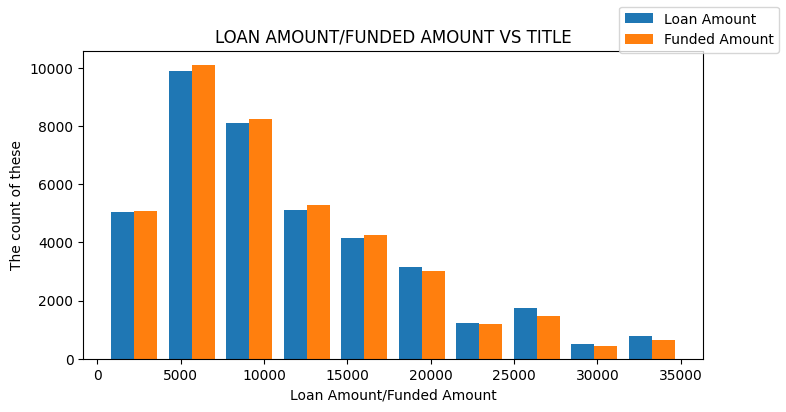

In [138]:
fig = plt.figure(figsize = (8,4))
plt.hist(x = [loan_dataset_cp.loan_amnt, loan_dataset_cp.funded_amnt], label = ['Loan Amount', 'Funded Amount'])
plt.xlabel("Loan Amount/Funded Amount")
plt.ylabel("The count of these")
plt.title("LOAN AMOUNT/FUNDED AMOUNT VS TITLE")
fig.legend()
fig.show()

##### Just a pivot_table analysis

In [87]:
#let's do average funded amount for defaulters and not defauotrers for the 36 and 60 months period

In [88]:
loan_dataset_cp.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_pymnt_d', 'pub_rec_bankruptcies', 'defaulted'],
      dtype='object')

In [90]:
loan_dataset_cp.pivot_table(index = 'defaulted', columns = 'term', values = 'funded_amnt', aggfunc = 'mean')

term,36 months,60 months
defaulted,,
0,9495.432757,14966.135507
1,9258.064766,15108.583333
